$$\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}$$

# Simple sources

Consider a source with a complex source strength Q:

\begin{equation}
\pad{V}{n}=\int_S \vb{u} \cdot \vb{n} dS= Q \cdot e^{i\omega t}
\label{eq:7.1}\tag{7.1}
\end{equation}

then the pressure radiated from this source is 

\begin{equation}
p(r,t)=\frac{1}{2} i \rho_0 c \left(\frac{Q}{\lambda r}\right) e^{i(\omega t - k r)}
\label{eq:7.2}\tag{7.2}
\end{equation}

Please check this expression with the source strength of a pulsating sphere $U=U_0 e^{i\omega t}$.


## Line source

The first example of simple sources besides the spherical shell is the line source. It consist of a cylinder with length $L$ and radius $a$ oscillating radially. The cylinder is aligned horizontally along the x-axis as shown in [Fig. 7.1](#fig1).

<img src="images/linesource.png" width=300> <p>
<a id='fig1'><center> Figure 7.1 </center></a>

The infinitesimal source strength $dQ$ is

\begin{equation}
dQ=U_0 2 \pi a dx
\label{eq:7.3}\tag{7.3}
\end{equation}

The complex pressure field emitted from the cylinder can be calculated by integrating over the infinitesimal sources, i.e. 

\begin{equation}
p(\vb{r},t)=\frac{1}{2} i \rho_0 c U_0 \frac{2 \pi a}{\lambda} \int_{-L/2}^{L/2} \frac{1}{r'} e^{i(\omega t - k r')} dx
\label{eq:7.4}\tag{7.4}
\end{equation}

It is important to note that the radiated sound pressure field depends only on $k a$ and not on the wavelength or the dimension of the cylinder alone. Thus let us write Eq. (7.4) again with $k a$:

\begin{equation}
p(\vb{r},t)=\frac{1}{2} i \rho_0 c U_0 k a \int_{-L/2}^{L/2} \frac{1}{r'} e^{i(\omega t - k r')} dx
\label{eq:7.5}\tag{7.5}
\end{equation}

The integral in Eq. (7.5) is difficult to solve as $r'$ depends complicated on $r$. Yet we can simplify Eq. (7.5) if we allow for distances $r\ll L$. That means that we are only describing the *far field* of the sound field.

Then the $\frac{1}{r'}\approx\frac{1}{r}$ and the $r'$ in the exp-function can be expressed as $r'\approx r-x\sin\Theta$ and we approximate Eq. (7.5) as:

\begin{equation}
p(r,\Theta,t)=\frac{1}{2} i \rho_0 c U_0 \frac{k a}{r} e^{i\omega t} \int_{-L/2}^{L/2} e^{ik x\sin\Theta)} dx
\label{eq:7.6}\tag{7.6}
\end{equation}

The integral can be evaluated and Eq. (7.6) becomes

\begin{equation}
p(r,\Theta,t)=\frac{1}{2} i \rho_0 c U_0 \frac{k a}{r} L \left(\frac{\sin(\frac{1}{2}k L \sin \Theta)}{\frac{1}{2}k L \sin \Theta}\right)e^{i(\omega t - k r)}
\label{eq:7.7}\tag{7.7}
\end{equation}


The real pressure amplitude in the far field is

\begin{equation}
P(r,\Theta)=\frac{1}{2} \rho_0 c U_0 \frac{k a}{r} L \left|\frac{\sin(\frac{1}{2}k L \sin \Theta)}{\frac{1}{2}k L \sin \Theta}\right|,
\label{eq:7.8}\tag{7.8}
\end{equation}

which can be split into a radial, $P_{ax}$ and angle or directional dependent pressure amplitude, $H(\Theta)$:

\begin{equation}
P(r,\Theta)=P_{ax}(r) H(\Theta)
\label{eq:7.9}\tag{7.9}
\end{equation}

with 

\begin{eqnarray}
P_{ax}=\frac{1}{2} \rho_0 c U_0 \frac{a}{r} k L\label{eq:7.10}\\
H(\Theta)=\left|\frac{\sin \theta}{\theta}\right|\label{eq:7.11}
\end{eqnarray}

where $\theta=\frac{1}{2} k L \sin \Theta$.

We see that the radial pressure drops with $r^{-1}$ in the far field. This is true for all simple sources.
The directional factor $H(\Theta)$ is a sinc function (or zeroth order Bessel function of the first kind).

The program below calculates and plots the directional factor. 

#### Your Turn:
* Investigate how the directional pattern changes with $k L$. Under which angles do you find minima of the sidelobes for $kL=15$.
* Make plots in linear and dB scale.
* Think of possible (approximate) realizations of line sources

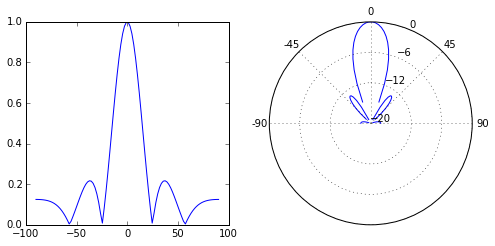

In [41]:
%matplotlib inline
import math as m
import numpy as np
import matplotlib.pyplot as plt

#calculate the dB scale
def dbnorm(x):
    return 20*np.log10(np.abs(x)/np.max(x))

theta=np.linspace(-m.pi/2.,m.pi/2.,100)
kL=15
H=np.sin(.5*kL*np.sin(theta))/(.5*kL*np.sin(theta))
HdB=dbnorm(H)

plt.figure(figsize=(8,8), dpi=100)

ax1 = plt.subplot(221)

plt.plot(theta*180./m.pi,np.abs(H))

ax2 = plt.subplot(222, projection='polar')

#to make the plot look nice
ax2.set_theta_zero_location('N');ax2.set_theta_direction('clockwise')
ax2.set_yticks(np.array([-20, -12, -6, 0]));ax2.set_ylim(-20,0)
ax2.set_xticks(np.array([0, 45, 90, np.nan, np.nan, np.nan, 270, 315])/180.*m.pi)
ax2.set_xticklabels(('0','45','90','','','','-90','-45'))

c = plt.plot(theta, HdB)
plt.show()

## Plane Circular Piston

The next source is a baffeled piston. It is a disc of radius $a$ oscillating with a velocity $U_0$ and embedded in an infinite flat and rigid wall (baffle). The geometry is depicted in [Fig. 7.2](#fig2).

<img src="images/pistonsource.png" width=400> <p>
<a id='fig2'><center> Figure 7.2 </center></a>

The source strength is $dQ=U_0 dS$. Thus the radiated pressure can be obtained from the standard expression

\begin{equation}
p=\frac{1}{2} i \rho_0 c \frac{U_0}{\lambda} \int_S \frac{1}{r'} e^{i(\omega t - k r')} dS
\label{eq:7.12}\tag{7.12}
\end{equation}

Closed form solutions of Eq. (7.12) are only available for the axial pressure field ($\Theta=0$) and the far field approximation. We start with the axial pressure field

### Axial response

Along the axis the distance $r'$ is $\sqrt{r^2+\sigma^2}$ with $\sigma$ begin the radial position of the source, see [Fig. 7.2](#fig2). We obtain the following expression:

\begin{equation}
p=\frac{1}{2} i \rho_0 c \frac{U_0}{\lambda} e^{i\omega t} \int_0^a 
\frac{e^{-ik \sqrt{r^2+\sigma^2}}}{\sqrt{r^2 + \sigma^2}} 2 \pi \sigma d\sigma 
\label{eq:7.13}\tag{7.13}
\end{equation}

The kernel of Eq. (7.13) is a perfect differential and can therefore be integrated. We obtain:

\begin{equation}
p(r,0,t)=\rho_0 c U_0 \left[1-e^{-ik\left(\sqrt{r^2+a^2}-r\right)}\right] \cdot e^{i(\omega t - k r)}
\label{eq:7.14}\tag{7.14}
\end{equation}

The pressure amplitude, $P(r)$ is the magnitude of the real part of Eq. (7.14) which is

\begin{equation}
P(r,\theta=0)=2 \rho_0 c U_0 \left|\sin \frac{1}{2} k r \left(\sqrt{1+\left(\frac{a}{r}\right)^2}-1 \right)\right|
\label{eq:7.15}\tag{7.15}
\end{equation}


The pressure amplitude $P(r,\Theta=0)$, Eq. (7.15) is a rather complicated function with many extrema. We can simplify the expression if we look (1) at the far field $r \ll a$ and (2) demand that $\frac{r}{a}>\frac{ka}{2}$. The far field approximation allows to simplify the argument of the sin-function in Eq. (7.15):

\begin{equation}
P(r,\theta=0) \approx 2 \rho_0 c U_0 \left|\sin \frac{1}{2} k r \frac{1}{2} \left(\frac{a}{r}\right)^2 \right|=
2 \rho_0 c U_0 \left|\sin \frac{1}{2} \frac{ka}{2} \left(\frac{r}{a}\right)^{-1}\right|
\label{eq:7.16}\tag{7.16}
\end{equation}

The second approximation demands that we are sufficiently far from the source in terms of wavelengths (this becomes clearer below). Looking at the argument of the sin-function in the far field approximation Eq. (7.16) we see that we can then approximate $\sin(x)\approx x$ and obtain the expression

\begin{equation}
P_{ax} \approx \frac{1}{2} \rho_0 c U_0 \left(\frac{a}{r}\right) \left( k a\right)
\label{eq:7.17}\tag{7.17}
\end{equation}

Again we reveal the $r^{-1}$ dependency for simple sources in the far field approximation.

The second approximation leads directly to the Rayleigh length, $r>\frac{k a^2}{2}=\frac{\pi a^2}{\lambda}=\frac{S}{\lambda}$

But now let us study the Eq. (7.15) and find the position of the extrema

\begin{equation}
\frac{1}{2} k r \left(\sqrt{1+\left(\frac{a}{r}\right)^2}-1 \right) = \frac{m \pi}{2} \quad m=0,1,2,...
\label{eq:7.18}\tag{7.18}
\end{equation}

Simple rearrangement of Eq. (7.18) leads to the condition for extrema

\begin{equation}
\frac{r_m}{a}=\frac{a}{m\lambda} - \frac{m\lambda}{4 a}
\label{eq:7.19}\tag{7.19}
\end{equation}

Next we plot Eq. (7.15) as a function of $r/a$ with $k a=8 \pi$ and normalized by the maximum amplitude.

#### Your Turn
* Please verify the first extrema $r_1/a$ which is a maximum, and the second minimum $r_2/a$ in the plot.
* Add in a plot for the far field Eq. (7.17), show that the Rayleigh length is a good approximation for the far field distance.
* Investigate how the pressure field changes with increasing and decreasing $k a$.

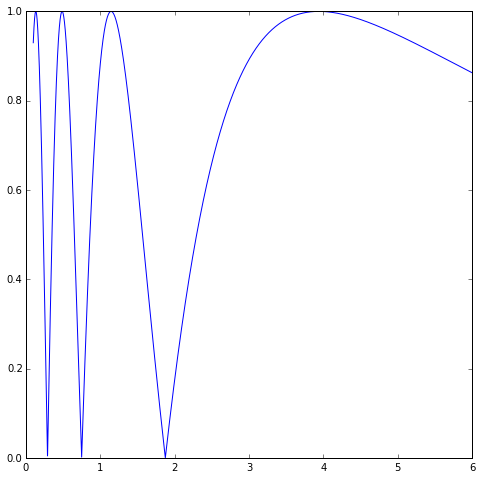

In [49]:
%matplotlib inline
import math as m
import numpy as np
import matplotlib.pyplot as plt

#r/a
roa=np.linspace(0.1,6.,5000)
#k*a
ka=8*np.pi
#P as a function of ka and r/a
P=np.sin(.5*ka*roa*(np.sqrt(1+roa**-2.)-1.))

plt.figure(figsize=(8,8), dpi=100)
plt.plot(roa,np.abs(P))

plt.show()

### Far field response
Now we want to calculate the emitted pressure field as a function of $\Theta$ under the far field approximation, $r \ll a$.
The geometry is depicted in [Fig. 7.3](#fig3).

<img src="images/piston2source.png" width=400> <p>
<a id='fig3'><center> Figure 7.4 </center></a>

We integrate in x-direction over line sources with length $2 a \sin \phi$, thus the source strength is

\begin{equation}
dQ=2 U_0 a \sin \phi dx
\label{eq:7.20}\tag{7.20}
\end{equation}

The infinitesimal pressure is

\begin{equation}
dp=2 \left( \frac{1}{2} i \rho_0 c \left( \frac{dQ}{\lambda r'}\right) e^{i(\omega t - k r')}\right)=
i\rho_0 c \frac{U_0}{\pi r'} k a \sin \phi e^{i(\omega t - k r')} dx
\label{eq:7.21}\tag{7.21}
\end{equation

The factor 2 is the result of the baffle, effectivly doubling the emitted pressure. Please check Kinsler et al. (Fundamental of Acoustics, Chapter 7.2) for the derivation of the baffeled source.

In the far field $r \ll a$ we can approximate $r'$ in the exponent as $r'\approx r + \Delta r = r - a \sin\Theta \cos \phi$ and the $r'$ in the denominator of Eq. (7.21) becomes $r$ as done for the line source.

\begin{equation}
p(r,\Theta,t)=i \rho_0 c \frac{U_0}{\pi r} k a e^{i(\omega t - k r)}
\int_{-a}^a e^{i k a \sin \Theta cos \phi}\sin\phi dx
\label{eq:7.22}\tag{7.22}
\end{equation}

The integration can be replaced with $d\phi$, i.e. $dx=-a \sin \phi d\,\phi$ and we obtain:

\begin{equation}
p(r,\Theta,t)=i \rho_0 c \frac{U_0}{\pi} \frac{a}{r} k a e^{i(\omega t - k r)}
\int_0^\pi e^{i k a \sin \Theta cos \phi}\sin^2\phi d\,\phi
\label{eq:7.23}\tag{7.23}
\end{equation}


The integral is solvable using leading to a Bessel function $J_1(z)$ with $z=k a \sin \Theta$.

\begin{equation}
p(r,\theta,t)=\frac{1}{2} i \rho_0 c U_0 \frac{a}{r} k a \left[ \frac{2 J_1(k a \sin \Theta)}{k a \sin \Theta}\right]
e^{i(\omega t - k r)}
\label{eq:7.24}\tag{7.24}
\end{equation}

The magnitude of the real pressure is

\begin{equation}
\left|p(r,\Theta)\right|=P_{ax}(r) H(\Theta)
\label{eq:7.25}\tag{7.25}
\end{equation}

where $P_{ax}$ is stated in Eq. (7.17). The directivity factor $H(\Theta)$ is 

\begin{equation}
H(\Theta)=\left|\frac{2 J_1 (z)}{z}\right| \quad \mathrm{with}\quad z= k a \sin \Theta
\label{eq:7.26}\tag{7.26}
\end{equation}

##### Your Turn

* Investigate the dependency of the pattern as a function of $k a$. What happens if you increase directivity?
* Consider a constant sized piston. How does the directivity pattern change if the frequency is increased/decreased? Can you relate this to listening to music (flutes/drums) in a room?


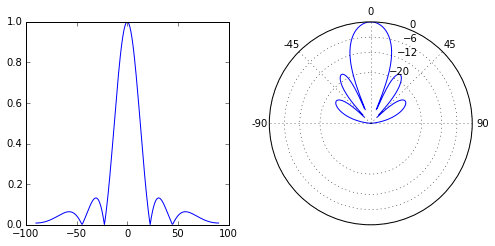

In [64]:
%matplotlib inline
import math as m
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp #for the Bessel function
#calculate the dB scale
def dbnorm(x):
    return 20*np.log10(np.abs(x)/np.max(x))

theta=np.linspace(-m.pi/2.,m.pi/2.,300)
ka=10.
H=2.*sp.jv(1,ka*np.sin(theta))/(ka*np.sin(theta))
HdB=dbnorm(H)

plt.figure(figsize=(8,8), dpi=100)

ax1 = plt.subplot(221)

plt.plot(theta*180./m.pi,np.abs(H))

ax2 = plt.subplot(222, projection='polar')

#to make the plot look nice
ax2.set_theta_zero_location('N');ax2.set_theta_direction('clockwise')
ax2.set_yticks(np.array([-20, -12, -6, 0]));ax2.set_ylim(-40,0)
ax2.set_xticks(np.array([0, 45, 90, np.nan, np.nan, np.nan, 270, 315])/180.*m.pi)
ax2.set_xticklabels(('0','45','90','','','','-90','-45'))

c = plt.plot(theta, HdB)
plt.show()